In [1]:
import gym
import gym_anytrading
# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/home/sirbruce/anaconda3/envs/rl_quant/lib/python3.7/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
df = pd.read_csv('stock_indicators.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', ascending=True, inplace=True)
df.set_index('Date', inplace=True)
df.rename(columns={'Close__QQQ': 'close', 'Open__QQQ': 'open', 'High__QQQ': 'high', 'Low__QQQ': 'low', 'Volume__QQQ': 'volume'}, inplace=True)
df.head()

,UMCSENT,CPIAUCSL,PAYEMS,Adj Close__QQQ,close,high,low,open,volume,Adj Close__SPY,...,High__SPY,Low__SPY,Open__SPY,Volume__SPY,Open__Gold,High__Gold,Low__Gold,Close__Gold,Adj_Close__Gold,Volume__Gold
Date,,,,,,,,,,,,,,,,,,,,,
2000-08-30,107.3,172.7,132231.0,84.770271,98.875,99.500000,97.765625,98.3125,10545300.0,98.265503,...,151.500000,150.34375,151.3125,3964800.0,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,107.3,172.7,132231.0,87.128029,101.625,102.000000,98.875000,99.6250,15588700.0,99.572716,...,153.093750,150.90625,151.0625,4863100.0,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,106.8,173.6,132356.0,87.985336,102.625,103.515625,101.187500,103.0000,14071900.0,99.674850,...,153.593750,152.00000,153.2500,3191200.0,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,106.8,173.6,132356.0,85.306175,99.500,101.750000,99.421875,101.6250,16348300.0,98.878250,...,152.203125,150.81250,151.8750,3470800.0,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,106.8,173.6,132356.0,82.305420,96.000,99.484375,95.500000,99.2500,20964900.0,97.754822,...,151.953125,149.53125,151.1875,4322200.0,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [3]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [4]:
df['SMA'] = TA.SMA(df, 50)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [5]:
df.head(15)

,UMCSENT,CPIAUCSL,PAYEMS,Adj Close__QQQ,close,high,low,open,volume,Adj Close__SPY,...,Volume__SPY,Open__Gold,High__Gold,Low__Gold,Close__Gold,Adj_Close__Gold,Volume__Gold,SMA,RSI,OBV
Date,,,,,,,,,,,,,,,,,,,,,
2000-08-30,107.3,172.7,132231.0,84.770271,98.8750,99.500000,97.765625,98.312500,10545300.0,98.265503,...,3964800.0,273.899994,273.899994,273.899994,273.899994,273.899994,0,0.0,0.000000,0.0
2000-08-31,107.3,172.7,132231.0,87.128029,101.6250,102.000000,98.875000,99.625000,15588700.0,99.572716,...,4863100.0,274.799988,278.299988,274.799988,278.299988,278.299988,0,0.0,100.000000,15588700.0
2000-09-01,106.8,173.6,132356.0,87.985336,102.6250,103.515625,101.187500,103.000000,14071900.0,99.674850,...,3191200.0,277.000000,277.000000,277.000000,277.000000,277.000000,0,0.0,100.000000,29660600.0
2000-09-05,106.8,173.6,132356.0,85.306175,99.5000,101.750000,99.421875,101.625000,16348300.0,98.878250,...,3470800.0,275.799988,275.799988,275.799988,275.799988,275.799988,2,0.0,51.359936,13312300.0
2000-09-06,106.8,173.6,132356.0,82.305420,96.0000,99.484375,95.500000,99.250000,20964900.0,97.754822,...,4322200.0,274.200012,274.200012,274.200012,274.200012,274.200012,0,0.0,32.369558,-7652600.0
2000-09-07,106.8,173.6,132356.0,84.127289,98.1250,99.421875,96.562500,96.812500,16669700.0,98.592331,...,4265500.0,274.000000,274.000000,274.000000,274.000000,274.000000,125,0.0,45.536630,9017100.0
2000-09-08,106.8,173.6,132356.0,81.555260,95.1250,98.000000,94.765625,97.765625,23475200.0,97.918274,...,3518200.0,273.299988,273.299988,273.299988,273.299988,273.299988,0,0.0,35.136247,-14458100.0
2000-09-11,106.8,173.6,132356.0,79.572617,92.8125,96.125000,92.000000,94.500000,27262100.0,97.775368,...,3937500.0,273.100006,273.100006,273.100006,273.100006,273.100006,0,0.0,29.536237,-41720200.0
2000-09-12,106.8,173.6,132356.0,78.340195,91.3750,94.687500,90.843750,93.500000,24256000.0,97.060524,...,4769100.0,272.899994,272.899994,272.899994,272.899994,272.899994,0,0.0,26.688686,-65976200.0


In [6]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['low', 'volume','SMA', 'RSI', 'OBV', 'UMCSENT', 'CPIAUCSL','PAYEMS', 'Close__Gold']].to_numpy()[start:end]
    return prices, signal_features

In [7]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=200, frame_bound=(200,1200))

In [8]:
env2.signal_features

array([[9.77656250e+01, 1.05453000e+07, 0.00000000e+00, ...,
        1.72700000e+02, 1.32231000e+05, 2.73899994e+02],
       [9.88750000e+01, 1.55887000e+07, 0.00000000e+00, ...,
        1.72700000e+02, 1.32231000e+05, 2.78299988e+02],
       [1.01187500e+02, 1.40719000e+07, 0.00000000e+00, ...,
        1.73600000e+02, 1.32356000e+05, 2.77000000e+02],
       ...,
       [3.73300018e+01, 1.22163300e+08, 3.67448000e+01, ...,
        1.93700000e+02, 1.33940000e+05, 4.41700012e+02],
       [3.69599991e+01, 1.42144100e+08, 3.67630000e+01, ...,
        1.93700000e+02, 1.33940000e+05, 4.40500000e+02],
       [3.67000008e+01, 7.27808000e+07, 3.67880000e+01, ...,
        1.93700000e+02, 1.33940000e+05, 4.40299988e+02]])

In [9]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [10]:
model = A2C('MlpLstmPolicy', env, verbose=1,tensorboard_log='./a2c_stocks_FRED')





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




In [17]:
model.learn(total_timesteps=2000000)

ValueError: Error: cannot train the model without a valid environment, please set an environment withset_env(self, env) method.

In [12]:
# model.learn(total_timesteps=20000000)
# save the model to a file
# model.save("a2c_stocks_FRED_RL_model")

In [13]:
# model.save("a2c_stocks_FRED_RL_model")

In [18]:
model= A2C.load("a2c_stocks_FRED_RL_model")
# set the env
model.withset_env(env)

Loading a model without an environment, this model cannot be trained until it has a valid environment.


AttributeError: 'A2C' object has no attribute 'withset_env'

In [15]:
start = 200
end = 5000

In [16]:
RL_profits = []
for _ in range(10):
    env = MyCustomEnv(df=df, window_size=200, frame_bound=(start,end))
    obs = env.reset()
    cnt=0
    while True: 
        obs = obs[np.newaxis, ...]
        action, _states = model.predict(obs)
        if(action == [0]):
            cnt+=1
        obs, rewards, done, info = env.step(action)
        if done:
            print("info", info)
            break
    RL_profits.append(info['total_profit'])
    print(cnt)
# plot profits as a histogram
plt.hist(np.array(RL_profits), bins=20)
plt.xlabel('total profit')
plt.ylabel('number of episodes')
plt.title('A2C agent')
plt.show()

print("Average profit:", np.mean(RL_profits))
print("Max profit:", np.max(RL_profits))
print("Min profit:", np.min(RL_profits))
print("Variation in profits:", np.std(RL_profits))

KeyboardInterrupt: 

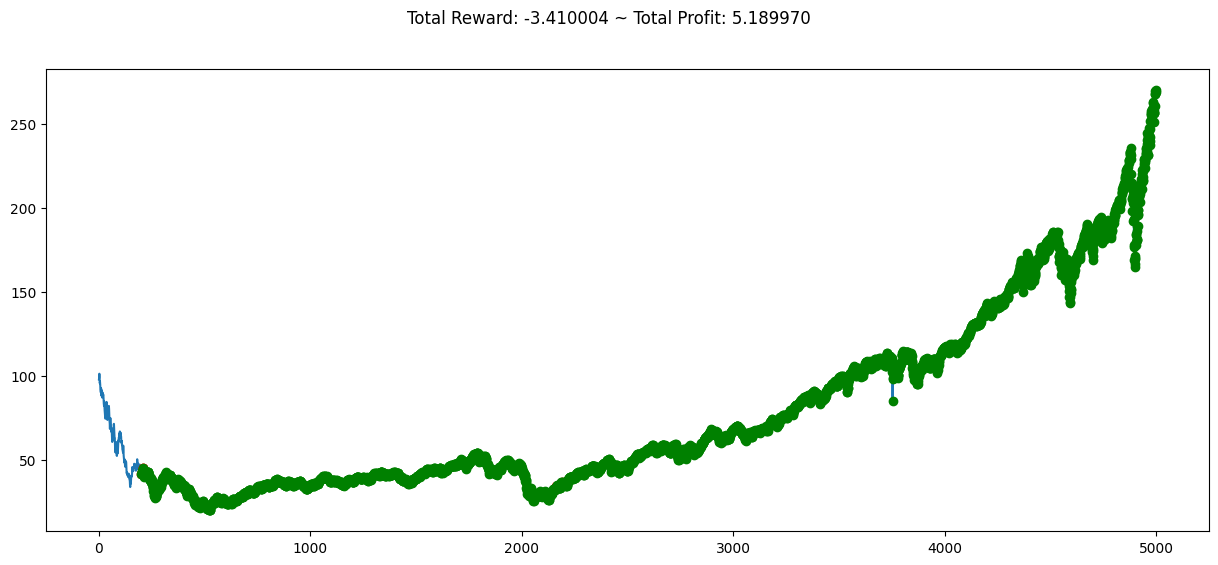

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

info {'total_reward': 137.68999290466363, 'total_profit': 5.935162215436244e-08, 'position': 0}
info {'total_reward': 77.95997428894117, 'total_profit': 3.221581594783624e-08, 'position': 0}
info {'total_reward': 96.14009094238276, 'total_profit': 3.651342528840378e-08, 'position': 1}
info {'total_reward': 122.329757690429, 'total_profit': 2.528645198852505e-08, 'position': 1}
info {'total_reward': 88.54014205932545, 'total_profit': 2.196769505917248e-08, 'position': 0}
info {'total_reward': 148.12003898620605, 'total_profit': 8.805925628450653e-08, 'position': 0}
info {'total_reward': 84.63991737365771, 'total_profit': 1.4179190566894778e-08, 'position': 0}
info {'total_reward': 104.95013809204093, 'total_profit': 3.6242766055883826e-08, 'position': 0}
info {'total_reward': 74.40021133422786, 'total_profit': 3.397115639571903e-08, 'position': 1}
info {'total_reward': 104.94010543823265, 'total_profit': 6.072464220763547e-08, 'position': 0}
info {'total_reward': 56.67994499206594, 'tot

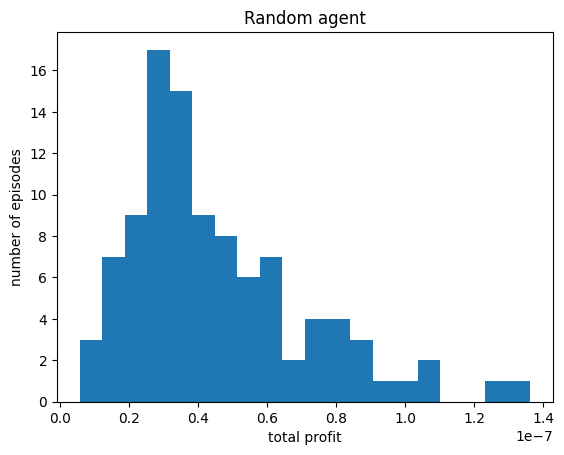

Average profit: 4.503188353041665e-08
Max profit: 1.362413952879991e-07
Min profit: 5.598012362253202e-09
Variation in profits: 2.5550357622001362e-08


In [ ]:
random_profits = []
for _ in range(100):
    env1=MyCustomEnv(df=df, window_size=12, frame_bound=(start,end))
    obs = env1.reset()
    while True:
        action = env1.action_space.sample()
        obs, rewards, done, info = env1.step(action)
        if done:
            print("info", info)
            break
    random_profits.append(info['total_profit'])

# plot profits as a histogram
plt.hist(np.array(random_profits), bins=20)
plt.xlabel('total profit')
plt.ylabel('number of episodes')
plt.title('Random agent')
plt.show()

print("Average profit:", np.mean(random_profits))
print("Max profit:", np.max(random_profits))
print("Min profit:", np.min(random_profits))
print("Variation in profits:", np.std(random_profits))

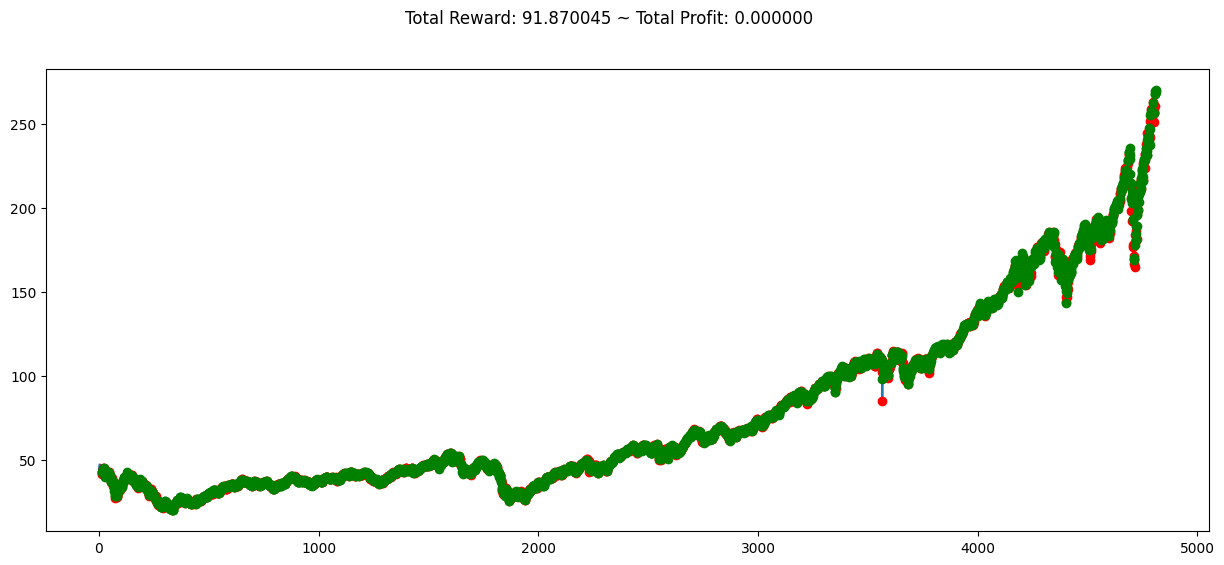

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env1.render_all()
plt.show()

In [ ]:

env1.max_possible_profit()